# ASI Hunting - SecurityEvent Template

We would like to guide you though your threat hunting efforts:
    1. Prepare the shell;
    2. Enter values;
    3. Execute queries;
    4. Analyze data.


## 0. Retrieve Log Analytics Information

In [1]:
import ipywidgets as widgets
from IPython.display import display

from utils import config_reader as mod
workspaceId = mod.config_reader.read_config_values("../config.json")[3]

######################################################################
your_workspace_Name = mod.config_reader.read_config_values("../config.json")[4]
print("Your Log Analytic Workspace: " + your_workspace_Name)
######################################################################

Your Log Analytic Workspace: zhzhaoasi


## 1. Install KQL Magic for Log Analytics

In [ ]:
# run once unless upgrade
!pip install Kqlmagic --no-cache-dir --upgrade


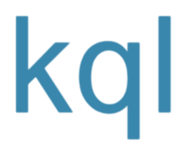

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
%reload_ext Kqlmagic

If you need any help for kql magic     --> %kql --help "help" -popup_window
If you need any help for Log Analytics --> %kql --help "LogAnalytics"

## 2. Log into Log Analytics

In [3]:
%kql loganalytics://code;workspace=workspaceId;alias="asidb"

<IPython.core.display.Javascript object>

## 3. Filter Data

1. Enter How many days looking back

In [ ]:
enteredDaysBack = input()

2. Select one data source that you want to work on

In [ ]:
dbSchema = %kql --schema "asidb@loganalytics"
tables = list(dbSchema.keys())
selectedTable = widgets.Dropdown(options=tables, value=tables[22],description='Data Table:')
display(selectedTable)

3. Select features

In [ ]:
columns = list(dbSchema[selectedTable.value])
columns.sort()
selectedFeatures = widgets.SelectMultiple(options=columns, value=[],description='Data Columns:')
display(selectedFeatures)

In [ ]:
print(selectedFeatures.value)

4. Pick values for selected features

In [ ]:
%kql {selectedTable.value} | where TimeGenerated >= ago({enteredDaysBack}d) | take 100
if len(_kql_raw_result_) > 0:
    df = _kql_raw_result_.to_dataframe()
else:
    df = None
    print('no data')

In [ ]:
def select_filter_value(df, column):
    df.columns = df.columns.str.strip()
    columnData = df[column].drop_duplicates().sort_values()
    selectedType = widgets.Dropdown(options=columnData, description=column)
    display(selectedType)
    return selectedType.value

In [ ]:
selectedPairs = {}
for index, column in enumerate(selectedFeatures.value):
    print(df[column].drop_duplicates().sort_values())
    print(selectedFeatures.value[index] + ": ")
    selectedPairs[selectedFeatures.value[index]] = input()

In [ ]:
whereClause = ""
for index, column in enumerate(selectedFeatures.value):
    whereClause += " | where " + selectedFeatures.value[index] + " contains '" + selectedPairs[selectedFeatures.value[index]].strip() + "'"

print(whereClause)

## 4. KQL operations, results are returned in Pandas DataFrame

In [ ]:
%kql {selectedTable.value} | where TimeGenerated >= ago({enteredDaysBack}d) {whereClause} | take 100
if len(_kql_raw_result_) > 0:
    df = _kql_raw_result_.to_dataframe()
else:
    df = None
    print('no data')

## 5. Data Analysis

In [ ]:
if df is not None:
    dfMachine = df.groupby(['AccountType', 'Computer'])['AccountType'].count()
    dfMachine.plot(kind='bar',x='AccountType')

In [ ]:
df